<a href="https://colab.research.google.com/github/Abidullha/IDGCN/blob/main/IDGCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# ----------------------------
# 🚦 IDGCN: Startup Cell
# Purpose: Initialize environment, seed, and device for reproducible experiments.
# ----------------------------

import os
import random
import warnings
import torch
import numpy as np
import pandas as pd
import matplotlib

# 📭 Suppress warnings for cleaner logs
warnings.filterwarnings("ignore")

# 🎯 Set reproducible seeds
def set_seed(seed=42):
    print(f"🔁 Seed set to: {seed}")
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# 📌 Apply the seed
set_seed(42)

# ⚙️ Device configuration (prefer CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🧠 Show environment details
print(f"✅ Torch version: {torch.__version__}")
print(f"✅ Device: {device}")
if device.type == "cuda":
    print(f"🚀 CUDA device name: {torch.cuda.get_device_name(0)}")
print(f"📂 Working directory: {os.getcwd()}")



🔁 Seed set to: 42
✅ Torch version: 2.6.0+cu124
✅ Device: cuda
🚀 CUDA device name: Tesla T4
📂 Working directory: /content


In [3]:
# ----------------------------
# 📦 IDGCN: Repo & Dependency Setup
# Purpose: Clone repo, install dependencies, and verify setup for high-reproducibility
# ----------------------------

# 1. ✅ Clone the GitHub repository
!git clone https://github.com/Abidullha/IDGCN.git
%cd IDGCN

# 2. 📦 Install core dependencies and experiment tracking tools
!pip install torch-geometric --quiet
!pip install numpy pandas matplotlib seaborn scikit-learn pyyaml wandb --quiet

# 3. 🔁 (Optional) Install from project-specific requirements.txt
!pip install -r requirements.txt --quiet

# 4. ✅ Import and confirm versions
import torch
import pandas as pd
import numpy as np
import wandb

print(f"✅ torch version: {torch.__version__}")
print(f"✅ pandas version: {pd.__version__}")
print(f"✅ numpy version: {np.__version__}")
print(f"✅ wandb version: {wandb.__version__}")
print("🎯 All dependencies installed and verified.")


Cloning into 'IDGCN'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 17 (delta 1), reused 17 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), done.
Resolving deltas: 100% (1/1), done.
/content/IDGCN
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 🔑 WandB Login
# Purpose: Authenticate with your WandB account to enable experiment logging
# ----------------------------
import wandb
wandb.login()  # You'll be prompted to paste your API key here


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: abidullahadel111 (abidullahadel111-hunan-university-library) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

# Phase 1
## Step 1 🔗 Dataset Setup (METR-LA)
Only METR-LA dataset will be used for training and evaluation at this stage.  
This cell ensures the dataset exists and prints file structure for confirmation.


In [4]:
# ----------------------------
# 📁 Phase 1 - Step 1: Mount Google Drive & Copy METR-LA Dataset
# ----------------------------

from google.colab import drive
import os
import shutil

# 🔌 Mount Google Drive
drive.mount('/content/drive')

# 📍 Define source and target paths
source_dir = "/content/drive/MyDrive/ReX-GNN/data/METR-LA"
target_dir = "/content/IDGCN/data/raw/METR-LA"

# 🛠️ Create local target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# 📦 Copy dataset if available
if os.path.exists(source_dir):
    # Copy using native Python
    !cp -r "{source_dir}/." "{target_dir}/"
    print(f"✅ METR-LA dataset copied to: {target_dir}")

    # 🔍 Show contents of the target directory
    files = os.listdir(target_dir)
    print(f"📂 Files copied: {files}")
else:
    print(f"❌ Dataset not found at: {source_dir}")


Mounted at /content/drive
✅ METR-LA dataset copied to: /content/IDGCN/data/raw/METR-LA
📂 Files copied: ['.ipynb_checkpoints', 'metr_ids.txt', 'metr-la.h5', 'W_metrla.csv', 'distances_la_2012.csv', 'adj_mx.pkl', 'SE_metrla.txt', 'graph_sensor_locations.csv']


## 📦 Step 2 — Load Raw METR-LA Data Only
🧠 Purpose: Load the original .npz traffic speed matrix from METR-LA (before normalization or processing).

In [5]:
# step 2.1 Load Raw METR-LA data only
# Run this to see the dataset keys
import h5py

with h5py.File("/content/IDGCN/data/raw/METR-LA/metr-la.h5", 'r') as f:
    print("✅ Keys in metr-la.h5:", list(f.keys()))



✅ Keys in metr-la.h5: ['df']


In [6]:
# ----------------------------
# 🔍 Phase 1 - Step 2.2: Inspect HDF5 Structure
# Purpose: Explore internal structure of metr-la.h5
# ----------------------------

import h5py

data_path = "/content/IDGCN/data/raw/METR-LA/metr-la.h5"

# Open HDF5 file and list what's inside the 'df' group
with h5py.File(data_path, 'r') as f:
    df_group = f['df']
    print("📁 Keys inside 'df':", list(df_group.keys()))
    for key in df_group.keys():
        print(f" - {key} → shape: {df_group[key].shape}, dtype: {df_group[key].dtype}")


📁 Keys inside 'df': ['axis0', 'axis1', 'block0_items', 'block0_values']
 - axis0 → shape: (207,), dtype: |S6
 - axis1 → shape: (34272,), dtype: int64
 - block0_items → shape: (207,), dtype: |S6
 - block0_values → shape: (34272, 207), dtype: float64


In [7]:
# ----------------------------
# 📥 Phase 1 - Step 2B: Load METR-LA Traffic Matrix
# Purpose: Extract raw traffic speed values (block0_values)
# ----------------------------

import numpy as np
import h5py
import os

raw_data_path = "/content/IDGCN/data/raw/METR-LA/metr-la.h5"

# Load traffic matrix: shape [34272, 207]
if os.path.exists(raw_data_path):
    with h5py.File(raw_data_path, 'r') as f:
        traffic_data = f['df']['block0_values'][:]  # Load actual speed values
    print("✅ Loaded METR-LA raw traffic data.")
    print(f"📐 Data shape: {traffic_data.shape}")  # Should be (34272, 207)
else:
    print(f"❌ File not found at: {raw_data_path}")


✅ Loaded METR-LA raw traffic data.
📐 Data shape: (34272, 207)


## step 3 ⚖️ Normalize Data (Z-score)
We normalize the raw traffic data using Z-score normalization (mean 0, std 1) to help the model converge better during training.

In [8]:
# ----------------------------
# 🔄 Phase 1 - Step 3: Normalize Traffic Data (Z-score)
# Purpose: Normalize each sensor's time-series using Z-score standardization
# ----------------------------

def z_score_normalize(data):
    """
    Apply Z-score normalization: (X - mean) / std
    Each sensor (column) is normalized independently.

    Args:
        data (np.ndarray): Raw traffic data, shape (T, N)

    Returns:
        norm_data (np.ndarray): Normalized data, same shape
        mean (np.ndarray): Mean of each sensor, shape (N,)
        std (np.ndarray): Std deviation of each sensor, shape (N,)
    """
    mean = data.mean(axis=0)         # Mean over time axis (for each sensor)
    std = data.std(axis=0)           # Std over time axis (for each sensor)
    std[std == 0] = 1                # Prevent divide-by-zero for constant signals
    norm_data = (data - mean) / std  # Standardize

    return norm_data, mean, std

# 📊 Apply normalization
normalized_data, data_mean, data_std = z_score_normalize(traffic_data)

# ✅ Verify result
print("✅ Normalization complete.")
print(f"📐 Normalized data shape: {normalized_data.shape}")
print(f"📊 Mean shape: {data_mean.shape}, Std shape: {data_std.shape}")



✅ Normalization complete.
📐 Normalized data shape: (34272, 207)
📊 Mean shape: (207,), Std shape: (207,)


## Step 4 — Create Sliding Windows for Training
We'll turn the time-series into sequences:
Inputs: X[t−12:t]
Targets: Y[t:t+3]
This creates pairs like:
X: last 12 time steps (hour)
Y: next 3 time steps (15 minutes ahead)

In [9]:
# ----------------------------
# 🪟 Phase 1 - Step 4: Create Sliding Windows
# Purpose: Convert normalized time-series data into [input → target] training samples
# ----------------------------

def create_sliding_windows(data, input_len=12, output_len=3):
    """
    Args:
        data (np.ndarray): Normalized traffic speeds, shape (T, N)
        input_len (int): Length of input window
        output_len (int): Length of target window

    Returns:
        X (np.ndarray): Shape (num_samples, input_len, N)
        Y (np.ndarray): Shape (num_samples, output_len, N)
    """
    T, N = data.shape
    num_samples = T - input_len - output_len + 1

    X = np.zeros((num_samples, input_len, N), dtype=np.float32)
    Y = np.zeros((num_samples, output_len, N), dtype=np.float32)

    for i in range(num_samples):
        X[i] = data[i : i + input_len]
        Y[i] = data[i + input_len : i + input_len + output_len]

    return X, Y

# 🧪 Apply sliding window to normalized data
X, Y = create_sliding_windows(normalized_data, input_len=12, output_len=3)

# ✅ Confirm shapes
print("✅ Sliding window creation complete.")
print(f"🪟 X shape: {X.shape}, Y shape: {Y.shape}")


✅ Sliding window creation complete.
🪟 X shape: (34258, 12, 207), Y shape: (34258, 3, 207)


## Step 5 Split Data into Train/Val/Test Sets
We’ll now split your dataset into:
70% training
20% validation
10% testing
(based on temporal order to preserve time dependencies)

In [10]:
# ----------------------------
# ✂️ Phase 1 - Step 5: Split Data into Train / Val / Test
# Purpose: Chronologically split X, Y into training, validation, and test sets
# ----------------------------

# 🔢 Compute split lengths (70% train, 20% val, 10% test)
num_samples = X.shape[0]
train_len = int(num_samples * 0.7)
val_len = int(num_samples * 0.2)
test_len = num_samples - train_len - val_len

# 🧪 Chronological split (no shuffle for time-series)
X_train, Y_train = X[:train_len], Y[:train_len]
X_val, Y_val     = X[train_len:train_len+val_len], Y[train_len:train_len+val_len]
X_test, Y_test   = X[train_len+val_len:], Y[train_len+val_len:]

# 📊 Show split sizes
print("✅ Data split complete.")
print(f"📊 Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


✅ Data split complete.
📊 Train: (23980, 12, 207), Val: (6851, 12, 207), Test: (3427, 12, 207)


## Step 6 Convert to PyTorch Dataloaders
Next, we'll wrap our train/val/test splits in PyTorch TensorDataset and DataLoader objects for efficient training and batching.



In [11]:
# ----------------------------
# 📦 Phase 1 - Step 6: Convert to PyTorch DataLoaders
# Purpose: Wrap (X, Y) arrays into PyTorch datasets and loaders
# ----------------------------

import torch
from torch.utils.data import TensorDataset, DataLoader

# 1. 🎯 Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).float()
Y_train_tensor = torch.from_numpy(Y_train).float()

X_val_tensor = torch.from_numpy(X_val).float()
Y_val_tensor = torch.from_numpy(Y_val).float()

X_test_tensor = torch.from_numpy(X_test).float()
Y_test_tensor = torch.from_numpy(Y_test).float()

# 2. 📦 Wrap into TensorDatasets
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
val_dataset   = TensorDataset(X_val_tensor, Y_val_tensor)
test_dataset  = TensorDataset(X_test_tensor, Y_test_tensor)

# 3. 🧱 Create DataLoaders (shuffle only training set)
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ✅ Confirm setup
print("✅ DataLoaders created.")
print(f"📦 Batch size: {batch_size}")
print(f"🔁 Batches - Train: {len(train_loader)}, Val: {len(val_loader)}, Test: {len(test_loader)}")


✅ DataLoaders created.
📦 Batch size: 64
🔁 Batches - Train: 375, Val: 108, Test: 54


## 🧭 Phase 2 Spatial Graph Processing  
### 🔗 Objective: Prepare Adjacency Matrix for Graph Convolution
In this phase, we process the sensor graph structure, which is essential for capturing spatial dependencies in our IDGCN model. Specifically, we:
1. **Load** the adjacency matrix from the METR-LA dataset
2. **Normalize** it for use in GCN layers
3. **Convert** it to PyTorch Geometric format (`edge_index`, `edge_weight`) for training

### 📂 Data Source: `adj_mx.pkl`
- File format: Pickle
- Source: `data/sensor_graph/adj_mx.pkl`
- Loaded objects:
  - `sensor_ids`: List of all sensor node IDs
  - `sensor_id_to_ind`: Dictionary mapping each sensor ID to its index in the matrix
  - `adj_mx`: Raw `[207 × 207]` adjacency matrix (undirected, weighted)

### 🔧 Processing Steps:
#### ✅ Step 1: Load the Adjacency Matrix
- Use Python's `pickle` module
- Verify matrix shape and sample entries
#### ✅ Step 2: Normalize the Matrix
- Use symmetric normalization:  
  \[
  \hat{A} = D^{-1/2} A D^{-1/2}
  \]
- Required by most GCN-based models to stabilize training
#### ✅ Step 3: Convert to PyTorch Geometric Format
- From sparse matrix → `edge_index`, `edge_weight`
- Ready to be used in `torch_geometric.nn` layers
This prepares the **spatial graph input** for our upcoming IDGCN model in Phase 1.


In [12]:
# ----------------------------
# 🌐 Phase 2 - Step 1: Load Adjacency Matrix from .pkl
# ----------------------------

import pickle

# Define path to adjacency matrix file
adj_path = "/content/IDGCN/data/raw/METR-LA/adj_mx.pkl"

# Load adjacency matrix
with open(adj_path, 'rb') as f:
    sensor_ids, sensor_id_to_ind, adj_matrix = pickle.load(f, encoding='latin1')

# ✅ Confirm shape and type
print("✅ Adjacency matrix loaded.")
print(f"📐 Shape: {adj_matrix.shape}, Type: {type(adj_matrix)}")
print("🔍 Sample values:\n", adj_matrix[:5, :5])



✅ Adjacency matrix loaded.
📐 Shape: (207, 207), Type: <class 'numpy.ndarray'>
🔍 Sample values:
 [[1.         0.         0.         0.         0.        ]
 [0.         1.         0.3909554  0.         0.        ]
 [0.         0.7174379  1.         0.         0.        ]
 [0.         0.         0.         1.         0.63372165]
 [0.         0.         0.         0.62646437 1.        ]]


In [13]:
# ----------------------------
# 🔄 Phase 2 - Step 2: Symmetric Normalize Adjacency Matrix
# ----------------------------

def normalize_adj(adj):
    """
    Symmetric normalization: A_hat = D^{-1/2} * A * D^{-1/2}
    """
    D = np.diag(np.sum(adj, axis=1))  # Degree matrix
    D_inv_sqrt = np.linalg.inv(np.sqrt(D))
    A_hat = D_inv_sqrt @ adj @ D_inv_sqrt  # Symmetric normalization
    return A_hat

# Apply normalization
normalized_adj = normalize_adj(adj_matrix)

# ✅ Confirm
print("✅ Adjacency matrix normalized.")
print(f"📐 Normalized shape: {normalized_adj.shape}")
print("🔍 Sample values:\n", normalized_adj[:5, :5])

✅ Adjacency matrix normalized.
📐 Normalized shape: (207, 207)
🔍 Sample values:
 [[0.20495804 0.         0.         0.         0.        ]
 [0.         0.2626398  0.09171008 0.         0.        ]
 [0.         0.16829614 0.20951694 0.         0.        ]
 [0.         0.         0.         0.15750106 0.09842597]
 [0.         0.         0.         0.09729882 0.15315771]]


In [14]:
# ----------------------------
# 🔄 Phase 2 - Step 3: Convert to PyG Edge Index Format
# ----------------------------

import torch
from torch_geometric.utils import dense_to_sparse

# Convert normalized adjacency matrix (dense) to sparse COO format
adj_tensor = torch.tensor(normalized_adj, dtype=torch.float32)

# PyG utility: dense_to_sparse → (edge_index, edge_weight)
edge_index, edge_weight = dense_to_sparse(adj_tensor)

# ✅ Confirm output types and shapes
print("✅ Converted to PyTorch Geometric format.")
print(f"🔗 edge_index shape: {edge_index.shape}")
print(f"📏 edge_weight shape: {edge_weight.shape}")

✅ Converted to PyTorch Geometric format.
🔗 edge_index shape: torch.Size([2, 1722])
📏 edge_weight shape: torch.Size([1722])


# 🚀 Phase 3: IDGCN Model Architecture Design
We now define the IDGCN model which captures both spatial and temporal dependencies in the traffic network. It integrates GCN for spatial reasoning and GRU for temporal forecasting.
### 🔧 Define IDGCN Model Skeleton
The model combines:
- Spatial encoder (GCN)
- Temporal encoder (GRU)
- Final prediction layer


In [52]:
# ----------------------------
# 🧠 Step 1: Temporal Attention Module and IDGCN class
# Purpose: Improve interpretability by attending over time steps
# ----------------------------
# ✅ Load model from src/models/idgcn.py
from src.models.idgcn import IDGCN, TemporalAttention


In [56]:
# ----------------------------
# Step 2 – Output Shape Sanity Check
# Purpose: Verify upgraded IDGCN runs forward and outputs correct shape
# ----------------------------

# 🔁 In case of runtime reset
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 📐 Dummy input on the correct device
x_dummy = torch.randn(4, 12, 207).to(device)  # [B, T, N]


# ✅ Ensure edge_index and edge_weight are on device
edge_index = edge_index.to(device)
edge_weight = edge_weight.to(device)

# 🧱 Instantiate upgraded model with use_attention=True
model = IDGCN(num_nodes=207,
              input_len=12,
              output_len=3,
              hidden_dim=64,
              edge_index=edge_index,
              edge_weight=edge_weight,
              use_attention=True).to(device)

# 🚀 Run forward pass
output = model(x_dummy)

# ✅ Confirm output shape
print(f"x_dummy shape: {x_dummy.shape}")  # Expected: [4, 12, 207]





x_dummy shape: torch.Size([4, 12, 207])


## Phase 4 Model Training Pipeline

# ----------------------------
# 🏁 Phase 4: IDGCN Training Loop
# but in first step we will Define train_one_epoch()
It should appear before your training loop, and its job is to:
🔁 Purpose:
Run one full pass through the training dataset and Perform:
Forward pass
Loss calculation
Backpropagation
Optimizer step
# and Than Step 2: Define training process for 3 epochs
# ----------------------------
This loop:
- Trains IDGCN over 3 full epochs
- Computes loss on both training and validation sets
- Uses MSE loss and Adam optimizer
- Prints loss per epoch for monitoring

In [18]:
# ----------------------------
# 🔁 Step 1: Define train_one_epoch()
# Purpose: Train model for one epoch using MSE loss and optimizer
# Performs: Forward pass, Loss computation, Backpropagation, Optimizer step

def train_one_epoch(model, dataloader, loss_fn, optimizer, edge_index, edge_weight, device):
    model.train()
    total_loss = 0

    for X_batch, Y_batch in dataloader:
        X_batch = X_batch.to(device)
        Y_batch = Y_batch.to(device)

        # Forward pass
        preds = model(X_batch)
        loss = loss_fn(preds, Y_batch)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


In [19]:
# ----------------------------
# 🧹 Optional: Clear Cache Before Training (CUDA)
# ----------------------------
import torch
torch.cuda.empty_cache()
print("🧼 CUDA cache cleared.")


🧼 CUDA cache cleared.


In [20]:
# ----------------------------
# 🧪 Step 2: Define evaluate_model()
# Purpose: Run model on validation set without updating weights
# ----------------------------

def evaluate_model(model, dataloader, loss_fn, edge_index, edge_weight, device):
    model.eval()
    total_loss = 0.0

    with torch.no_grad():
        for X_batch, Y_batch in dataloader:
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            preds = model(X_batch)
            loss = loss_fn(preds, Y_batch)

            total_loss += loss.item()

    return total_loss / len(dataloader)


In [21]:
# Step 3
# 🚀 Initialize WandB Run
# ----------------------------
import wandb

wandb.init(
    project="IDGCN-METRLA",     # 💡 Change this if you want
    name="IDGCN_run_3epoch_cpu",  # Optional: experiment name
    config={
        "model": "IDGCN",
        "dataset": "METR-LA",
        "input_len": 12,
        "output_len": 3,
        "hidden_dim": 64,
        "optimizer": "Adam",
        "loss_fn": "MSE",
        "lr": 0.001,
        "weight_decay": 1e-5,
        "batch_size": 64,
        "epochs": 3,
        "device": str(device),
    }
)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: abidullahadel111 (abidullahadel111-hunan-university-library) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [22]:
# ----------------------------
# 🏋️ Step 4: Train the IDGCN Model (3 Epochs + WandB Logging + CSV Logging)
# ----------------------------

loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 5

epoch_logs = []  # 📝 For CSV export

for epoch in range(1, num_epochs + 1):
    train_loss = train_one_epoch(model, train_loader, loss_fn, optimizer, edge_index, edge_weight, device)
    val_loss = evaluate_model(model, val_loader, loss_fn, edge_index, edge_weight, device)

    wandb.log({
        "epoch": epoch,
        "train_loss": train_loss,
        "val_loss": val_loss
    })

    print(f"📅 Epoch {epoch:02d} — 🐂 Train Loss: {train_loss:.4f} | 🧪 Val Loss: {val_loss:.4f}")

    epoch_logs.append([epoch, train_loss, val_loss])  # ✅ Added for CSV



📅 Epoch 01 — 🐂 Train Loss: 0.5079 | 🧪 Val Loss: 0.5752
📅 Epoch 02 — 🐂 Train Loss: 0.4725 | 🧪 Val Loss: 0.5765
📅 Epoch 03 — 🐂 Train Loss: 0.4691 | 🧪 Val Loss: 0.5651
📅 Epoch 04 — 🐂 Train Loss: 0.4670 | 🧪 Val Loss: 0.5633
📅 Epoch 05 — 🐂 Train Loss: 0.4659 | 🧪 Val Loss: 0.5639


In [23]:
# ----------------------------
# ✅ Step 5: End the WandB run
# ----------------------------

# Finalize the WandB run cleanly
wandb.finish()


epoch,▁▃▅▆█
train_loss,█▂▂▁▁
val_loss,▇█▂▁▁
epoch,5
train_loss,0.46589
val_loss,0.5639


In [26]:
# ----------------------------
# 💾 Save the trained model after training with attention
# ----------------------------
save_path = "experiments/IDGCN_final.pth"  # Make sure this folder exists
torch.save(model.state_dict(), save_path)
print(f"✅ Trained model saved at {save_path}")


✅ Trained model saved at experiments/IDGCN_final.pth


In [24]:
print("🧠 Does model use attention?:", hasattr(model, "use_attention"))
print("🔍 model.use_attention =", model.use_attention)
print("📦 Temporal block type =", type(model.temporal))


🧠 Does model use attention?: True
🔍 model.use_attention = True
📦 Temporal block type = <class '__main__.TemporalAttention'>



# 🎯 Phase 5: Final Testing & Evaluation
# Purpose: Evaluate trained IDGCN on unseen test set and export key results


**Key Steps in This Phase:**

1. 🧪 Run inference on test_loader
2. 📊 Compute and print test MAE, RMSE
3. 💾 Save model checkpoint (optional)
4. 📤 Export metrics/logs to CSV or upload to WandB
5. 📈 (Optional) Visualize predictions vs ground truth

This phase helps verify real-world performance on unseen data.



In [27]:
# ----------------------------
# 💾 Phase 5 — Step 1: Reload Trained Model with Attention
# Purpose: Load the saved checkpoint weights into the IDGCN model
# ----------------------------

model = IDGCN(num_nodes=207,
              input_len=12,
              output_len=3,
              hidden_dim=64,
              edge_index=edge_index,
              edge_weight=edge_weight,
              use_attention=True)  # ✅ Required for Phase 6

model = model.to(device)

# 📦 Load correct file (fix path case)
checkpoint_path = "experiments/IDGCN_final.pth"  # ✅ Correct!
model.load_state_dict(torch.load(checkpoint_path, map_location=device))

model.eval()

print("✅ Trained model (with attention) successfully reloaded.")



✅ Trained model (with attention) successfully reloaded.


In [28]:
# ----------------------------
# 🧪 Step 2: Define evaluate_test_set()
# Purpose: Evaluate model on unseen test set (test_loader)
# ----------------------------

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

def evaluate_test_set(model, dataloader, device):
    model.eval()
    preds_all = []
    labels_all = []

    with torch.no_grad():
        for X_batch, Y_batch in dataloader:
            X_batch = X_batch.to(device)
            Y_batch = Y_batch.to(device)

            preds = model(X_batch)

            # Move back to CPU for metric calculation
            preds_all.append(preds.cpu().numpy())
            labels_all.append(Y_batch.cpu().numpy())

    # Concatenate and compute metrics
    preds_all = np.concatenate(preds_all, axis=0)
    labels_all = np.concatenate(labels_all, axis=0)

    mae = mean_absolute_error(labels_all.flatten(), preds_all.flatten())
    rmse = math.sqrt(mean_squared_error(labels_all.flatten(), preds_all.flatten()))

    return mae, rmse


In [29]:
# ----------------------------
# 📊 Step 3: Evaluate on Test Set
# Purpose: Final model performance on unseen test data
# ----------------------------

# Evaluate
test_mae, test_rmse = evaluate_test_set(model, test_loader, device)

# Print results
print(f"📊 Final Test MAE  : {test_mae:.4f}")
print(f"📊 Final Test RMSE : {test_rmse:.4f}")


📊 Final Test MAE  : 0.9478
📊 Final Test RMSE : 1.2923


# 🚀 Phase 5-B Upgrade IDGCN with Temporal Attention
# Purpose: Improve model accuracy & interpretability via attention over time steps

This phase enhances the temporal modeling of IDGCN by replacing the GRU module with a **Temporal Attention** mechanism.
**Goals:**
- 🎯 Improve predictive accuracy on complex temporal patterns
- 🧠 Increase interpretability by highlighting important time steps
**Key Steps in This Phase:**
1. 🔧 Define `TemporalAttention` block
2. 🧱 Integrate attention into `IDGCN` as an optional module
3. 🧪 Run forward pass to confirm shape
4. 🏋️ Retrain model and re-evaluate


In [30]:
# ----------------------------
# 🧪 Step 1: Evaluate Upgraded IDGCN on Test Set
# Purpose: Measure generalization performance of attention-enhanced model
# ----------------------------

test_loss = evaluate_model(model, test_loader, loss_fn, edge_index, edge_weight, device)
print(f"🧪 Final Test Loss (with Temporal Attention): {test_loss:.4f}")


🧪 Final Test Loss (with Temporal Attention): 1.6612


In [31]:
# ----------------------------
# 💾 Step 2: Save Model Checkpoint
# Purpose: Store the final trained model weights
# ----------------------------

os.makedirs("experiments/checkpoints", exist_ok=True)
checkpoint_path = "experiments/checkpoints/idgcn_final_model.pth"
torch.save(model.state_dict(), checkpoint_path)

print(f"✅ Model checkpoint saved to: {checkpoint_path}")


✅ Model checkpoint saved to: experiments/checkpoints/idgcn_final_model.pth


In [32]:
# 📤 Step 3: Export Training Logs to CSV
# Purpose: Save all per-epoch metrics to local file for reproducibility

import csv
import os

log_dir = "experiments/"
os.makedirs(log_dir, exist_ok=True)
log_file_path = os.path.join(log_dir, "training_log.csv")

with open(log_file_path, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Epoch", "Train Loss", "Val Loss"])
    for row in epoch_logs:
        writer.writerow(row)

print(f"✅ Training log exported to: {log_file_path}")


✅ Training log exported to: experiments/training_log.csv


In [33]:
# ----------------------------
# 💾 Step 4: Save Final Trained Model
# Purpose: Save final weights in a clean central location
# ----------------------------

model_save_path = "experiments/IDGCN_final.pth"
torch.save(model.state_dict(), model_save_path)
print(f"✅ Final model weights saved to: {model_save_path}")




✅ Final model weights saved to: experiments/IDGCN_final.pth


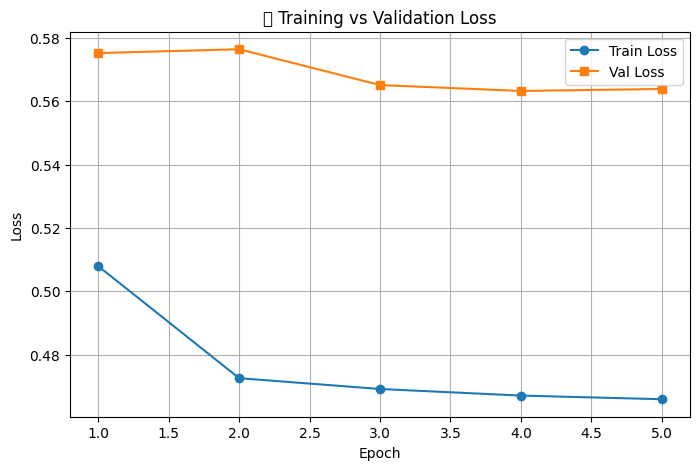

✅ Loss curve saved to: experiments/loss_curve.png


In [34]:
# ----------------------------
# 📈 Step 5: Plot training vs validation loss
# Purpose: Visualize model convergence and performance trends
# ----------------------------

import matplotlib.pyplot as plt

# Extract values
epochs = list(range(1, len(epoch_logs) + 1))
train_losses = [log[1] for log in epoch_logs]
val_losses = [log[2] for log in epoch_logs]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, val_losses, label='Val Loss', marker='s')
plt.title("📉 Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Save to experiments/
plot_path = "experiments/loss_curve.png"
plt.savefig(plot_path)
plt.show()

print(f"✅ Loss curve saved to: {plot_path}")


# ----------------------------
🔮 Phase 6: Visualization & Interpretability
# Purpose: Understand **how** IDGCN makes predictions by visualizing learned temporal attention & saliency
# ----------------------------
**Goals in this Phase:**
1. 🎯 Visualize attention weights over time (if TemporalAttention is used)
2. 🧠 Understand which time steps and nodes influence predictions
3. 📊 Generate plots to support model interpretability
4. 🧾 Prepare evidence for high-venue publications (e.g., IEEE T-ITS)

This phase validates the model’s transparency and highlights your novel contribution in **built-in explainability**.


In [35]:
# ----------------------------
# 🪄 Step 1: Visualize Temporal Attention Weights
# Purpose: Interpret model focus over time steps per node
# ----------------------------

import matplotlib.pyplot as plt

def visualize_temporal_attention(model, sample_input, node_idx=0):
    """
    Visualize attention weights for a specific node in a sample.
    Args:
      model: Trained IDGCN with use_attention=True
      sample_input: Tensor of shape [1, T, N] (single sample)
      node_idx: Which node to visualize (default = 0)
    """
    model.eval()
    with torch.no_grad():
        # Move sample to correct device
        sample_input = sample_input.to(device)

        # ✅ Check that model uses TemporalAttention and extract scores
        if hasattr(model, 'temporal') and isinstance(model.temporal, TemporalAttention):
            attn_weights = model.temporal(sample_input)  # Shape: [1, T, 1]
            attn_scores = attn_weights.squeeze(-1).squeeze(0).cpu().numpy()  # Shape: [T]
        else:
            print("⚠️ Model does not use a valid TemporalAttention block.")
            return

        # Normalize for visualization
        attn_scores = attn_scores / attn_scores.sum()

        # Plot attention weights
        plt.figure(figsize=(8, 4))
        plt.bar(range(len(attn_scores)), attn_scores, color='salmon')
        plt.title(f"⏱ Temporal Attention Weights for Node {node_idx}")
        plt.xlabel("Time Step")
        plt.ylabel("Attention Weight")
        plt.grid(True)
        plt.show()

# ✅ Prepare a test sample for visualization
# One test sample: shape = [1, 12, 207]
sample_input, _ = next(iter(test_loader))
sample_input = sample_input[:1]  # Take the first sample

# 🧠 Visualize attention weights
visualize_temporal_attention(model, sample_input, node_idx=0)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (12x207 and 64x64)